In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Iterable

FORCES_FILE = "force_hole.dat"
BASELINE_FILE = "force_baseline.dat"

In [40]:
data = pd.read_csv(
    FORCES_FILE,
    delim_whitespace=True,  # Handles the spacing between columns
    comment="#",  # Ignores lines starting with '#'
    header=None,  # No header in the data
    names=[
        "Time",
        "total_x",
        "total_y",
        "total_z",
        "pressure_x",
        "pressure_y",
        "pressure_z",
        "viscous_x",
        "viscous_y",
        "viscous_z",
    ],  # Assign meaningful column names
)

# Parse the str to float
data = data.apply(pd.to_numeric, errors="coerce")

baseline = pd.read_csv(
    BASELINE_FILE,
    delim_whitespace=True,  # Handles the spacing between columns
    comment="#",  # Ignores lines starting with '#'
    header=None,  # No header in the data
    names=[
        "Time",
        "total_x",
        "total_y",
        "total_z",
        "pressure_x",
        "pressure_y",
        "pressure_z",
        "viscous_x",
        "viscous_y",
        "viscous_z",
    ],  # Assign meaningful column names
)


# Parse the str to float
baseline = baseline.apply(pd.to_numeric, errors="coerce")

/var/folders/0k/b57mm7p92n705vxsd5p1t6gc0000gn/T/ipykernel_35809/763491407.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(
/var/folders/0k/b57mm7p92n705vxsd5p1t6gc0000gn/T/ipykernel_35809/763491407.py:23: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  baseline = pd.read_csv(


In [41]:
data.head()

,Time,total_x,total_y,total_z,pressure_x,pressure_y,pressure_z,viscous_x,viscous_y,viscous_z
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,108.11200,0.004749,17.960570,107.89090,0.004744,17.961860,0.221100,0.000004,-0.001284
2,2.0,25.10707,0.033456,4.876285,29.94374,0.033024,4.987972,-4.836669,0.000432,-0.111686
3,3.0,164.75460,0.473851,-4.661672,165.74400,0.472734,-4.573076,-0.989376,0.001118,-0.088596
4,4.0,28.55351,0.267226,-16.218000,28.83784,0.267581,-16.195190,-0.284330,-0.000355,-0.022813


## Computing the drag coefficient

The formula linking the drag force to the drag coefficient is given by:

$$F_d = \frac{1}{2} \rho v^2 A C_d$$

where:
- $F_d$ is the drag force,
- $\rho$ is the air density,
- $v$ is the velocity of the object,
- $A$ is the reference area,
- $C_d$ is the drag coefficient.

From this formula, we can deduce the drag coefficient as:

$$C_d = \frac{2 F_d}{\rho v^2 A}$$



### Experiments settings 
- $v=14m/s$
- We took $\rho = 1.225$

In [42]:
def drag_coeff(
    F_total: Iterable[float], rho: float, U_speed: float, S_area: float
) -> Iterable[float]:
    """
    Calculate the drag coefficient from the sum of forces in the x-direction.

    Parameters
    ----------
    force_sum : Iterable[float]
        Sum of forces in the x-direction.
    rho : float
        Density of the fluid.
    U_speed : float
        Speed of the fluid.
    area : float
        Area of the object.

    Returns
    -------
    Iterable[float]
        Drag coefficient.
    """
    return 2 * F_total / (rho * U_speed**2 * S_area)

In [43]:
len(baseline["Time"])

2001

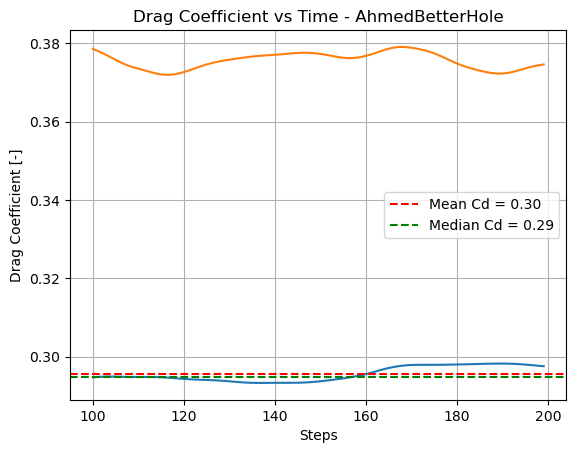

In [44]:
t_0 = 20
time = data["Time"][100:200]
force_drag = data["total_x"][400:500]
baseline_drag = baseline["total_x"][500:600]
force_drag = np.abs(force_drag)
baseline_drag = np.abs(baseline_drag)
rho = 1.225
U_speed = 14.0
A = 0.0105861
A_baseline = 0.0127684
cd = drag_coeff(force_drag, rho, U_speed, A)
baseline_cd = drag_coeff(baseline_drag, rho, U_speed, A_baseline)
mean_cd = np.mean(cd)
median_cd = np.median(cd)

# Plot the data
plt.plot(time, cd)
plt.plot(time, baseline_cd)
plt.xlabel("Steps")
plt.ylabel("Drag Coefficient [-]")
plt.title("Drag Coefficient vs Time - AhmedBetterHole")
# Add a horizontal line for the mean drag coefficient
plt.axhline(mean_cd, color="red", linestyle="--", label=f"Mean Cd = {mean_cd:.2f}")
plt.axhline(
    median_cd, color="green", linestyle="--", label=f"Median Cd = {median_cd:.2f}"
)
plt.legend()
# Add legend for baseline and current drag coefficient
# Add legend with the mean drag coefficient
plt.grid()